# messing_around_focused.ipynb
Noah Stiegler

6/18/24

Sorting through the COSMIC stamp hits > 25GHz dataset to find technosignatures!

Mostly looking at data from just the coherent beams on target

## Setup

In [1]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import Angle
from astropy.table import Table
from astropy.time import Time
import seaborn as sns

In [2]:
# Read in the data

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1":
    full_dataset_path = "/datax/scratch/nstieg/25GHz_higher.pkl"
    coherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_coherent.pkl"
    incoherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_incoherent.pkl"
else:
    raise Exception("Data path not known")

# Read in data
coherent = pd.read_pickle(coherent_dataset_path)
# incoherent = pd.read_pickle(incoherent_dataset_path)
# df = pd.read_pickle(full_dataset_path)

In [3]:
coherent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984740 entries, 0 to 31107169
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   id                       int64         
 1   signal_frequency         float64       
 2   signal_drift_rate        float64       
 3   signal_snr               float64       
 4   signal_beam              int64         
 5   signal_power             float64       
 6   signal_incoherent_power  float64       
 7   signal_num_timesteps     int64         
 8   tstart                   float64       
 9   tstart_h                 datetime64[ns]
 10  ra_hours                 float64       
 11  dec_degrees              float64       
 12  source_name              object        
dtypes: datetime64[ns](1), float64(8), int64(3), object(1)
memory usage: 318.8+ MB


## Observing Times on each Target

In [4]:
# Figure out where global observing starts and ends for the dataset
sorted_times = coherent["tstart_h"].unique()
sorted_times.sort()
first_time = sorted_times[0]
last_time = sorted_times[-1]

In [5]:
print(first_time)

2023-09-25T13:27:17.970905000


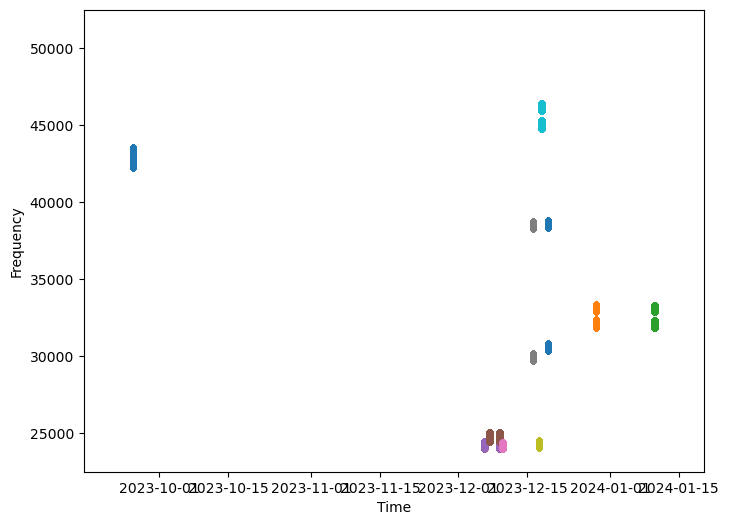

In [41]:
# Plot observations of different targets over time
fig, ax = plt.subplots(figsize=(8, 6))
scatter_handles = []
labels = []
for source in coherent["source_name"].unique():
    hits_on_source = coherent[coherent["source_name"] == source]
    xaxis = hits_on_source["tstart_h"]
    yaxis = hits_on_source["signal_frequency"]
    scatter_handles.append(ax.scatter(xaxis, yaxis, marker="."))
    labels.append(source)

# Set axes and title
ax.set_ylabel("Frequency")
ax.set_xlabel("Time")
ax.set_ylim([22500, 52500])
ten_days = np.timedelta64(10, 'D')
ax.set_xlim([first_time - ten_days, last_time + ten_days])

# Put the legend to the side
box = ax.get_position()
legend_ax = fig.add_axes([box.x0 + box.width + 0.02, box.y0, 0.05, box.height])
legend_ax.legend(handles=scatter_handles, labels=labels, loc='center', shadow=True)
legend_ax.axis('off')  # Hide the axis of the separate legend axis

# plt.title("COSMIC Coherent Targeted Observations")
plt.show()
    

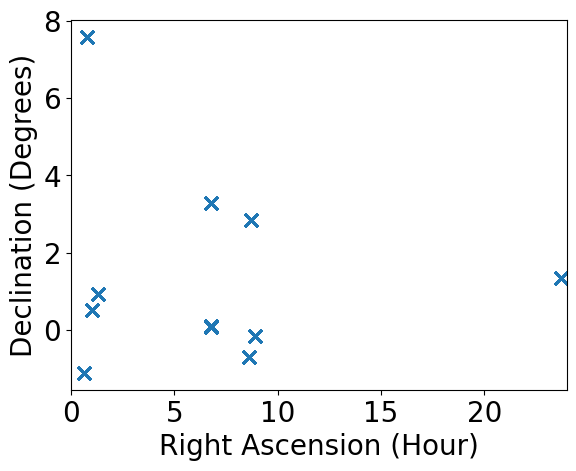

In [40]:
ras = coherent.ra_hours
decs = coherent.dec_degrees
plt.scatter(ras, decs, marker='x', s=75)
plt.xlabel("Right Ascension (Hour)", fontsize=20)
plt.ylabel("Declination (Degrees)", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlim([0, 24])
# plt.ylim([])
plt.show()

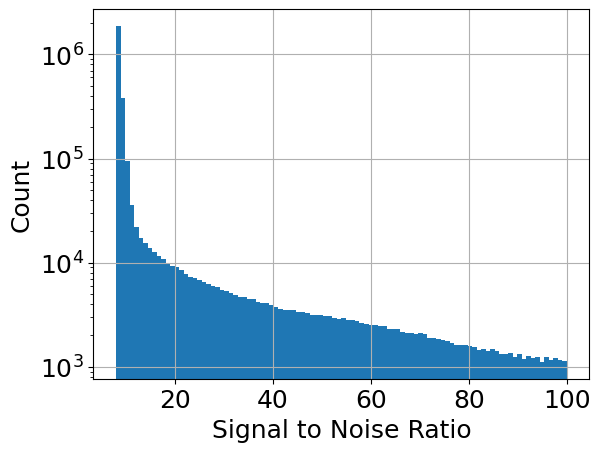

In [47]:
coherent[coherent.signal_snr < 100].signal_snr.hist(bins=100)
plt.yscale('log')
plt.xlabel("Signal to Noise Ratio", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


In [6]:
# # Looking at frequencies observed over time for each source
# # observed by a coherent beam
# for source in coherent["source_name"].unique():
# # source = coherent["source_name"].unique()[0]
#     # Get data
#     hits_on_source = coherent[coherent["source_name"] == source]
#     xaxis = hits_on_source["tstart_h"]
#     yaxis = hits_on_source["signal_frequency"]

#     # Plot data
#     fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#     # Want to make one that's zoomed in on frequency and time, and another that's global 25-50Ghz f and global t
#     ax.scatter(xaxis, yaxis, marker=".")

#     # Set labels and title
#     ax.set_xlabel('Time')
#     ax.set_ylabel("Frequency")
#     plt.title(f"Observations of {source}")
#     path = "/home/nstieg/BL-COSMIC-2024-proj/"
#     plt.savefig(path + f'plots/observations_blue/observations_of_{source}.png', format='png', dpi=300)
#     plt.show()

In [7]:
# # Looking at frequencies observed over time for each source
# # observed by a coherent beam
# for source in coherent["source_name"].unique():
#     # source = coherent["source_name"].unique()[1]
#     # Get data
#     hits_on_source = coherent[coherent["source_name"] == source]
#     xaxis = hits_on_source["tstart_h"]
#     yaxis = hits_on_source["signal_frequency"]

#     daily_counts = hits_on_source.groupby(pd.Grouper(key='tstart_h', freq='D')).size()
#     days = daily_counts.index.values

#     plt.scatter(days, daily_counts)
#     plt.xlabel("Date")
#     plt.ylabel("Number of hits on Date")
#     plt.title(f"Observations of {source}")
#     plt.show()

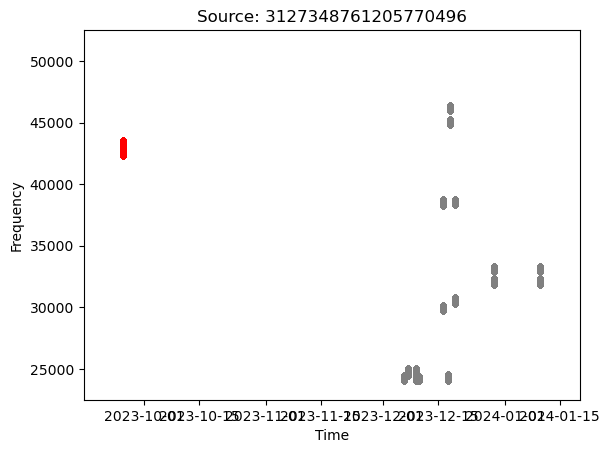

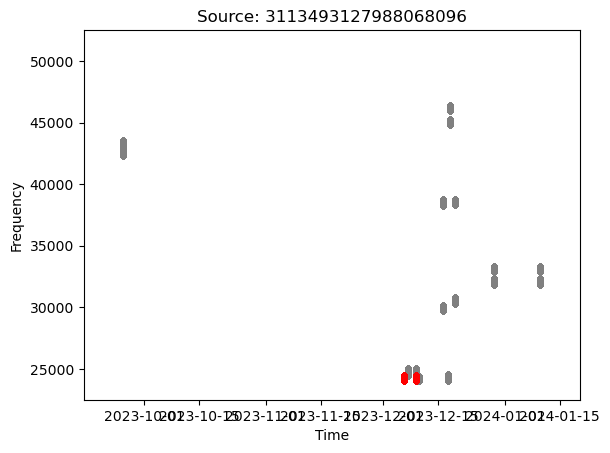

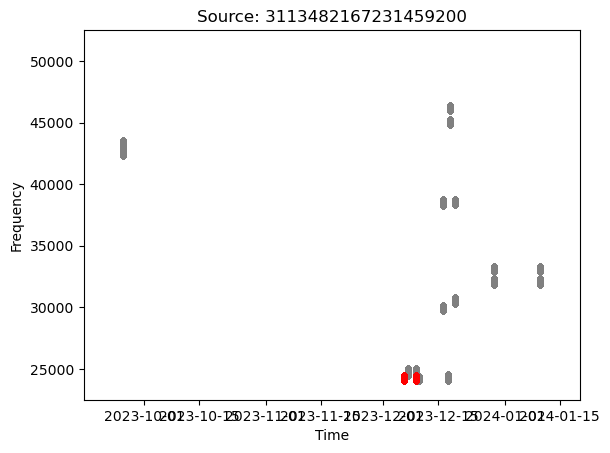

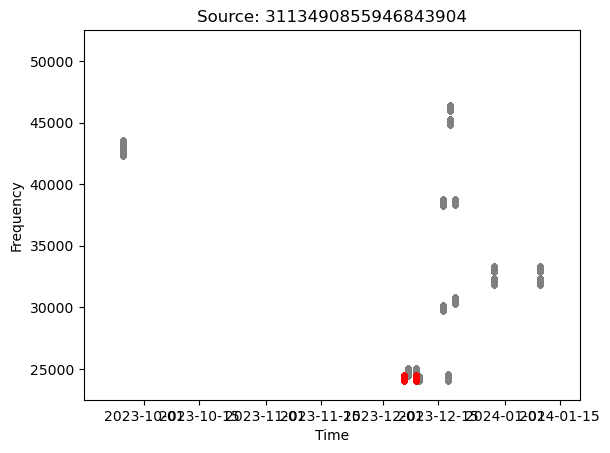

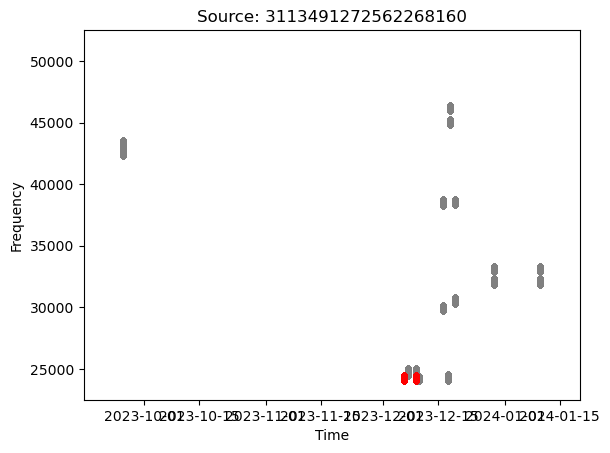

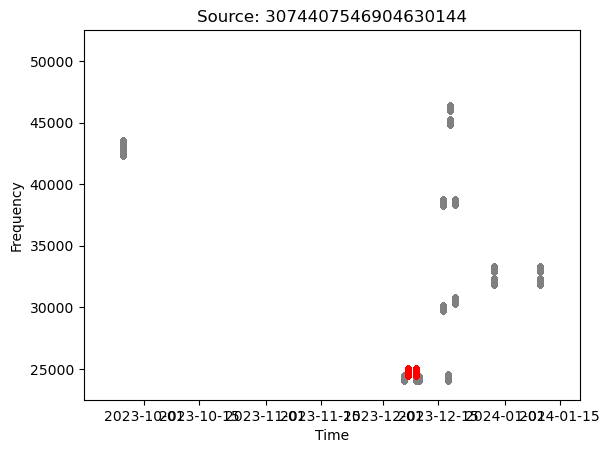

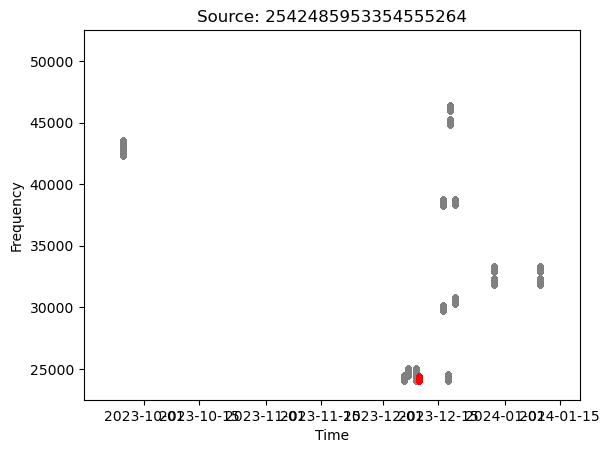

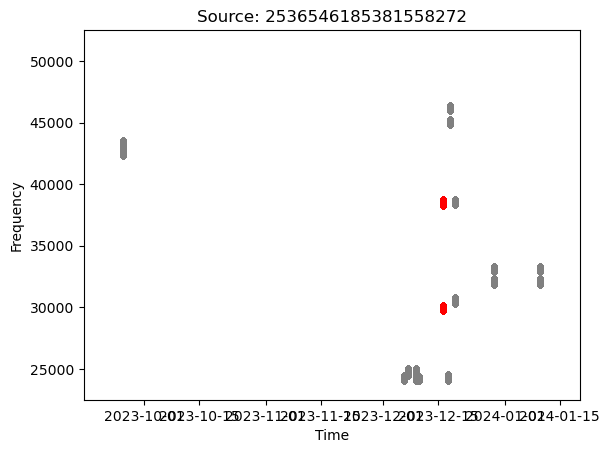

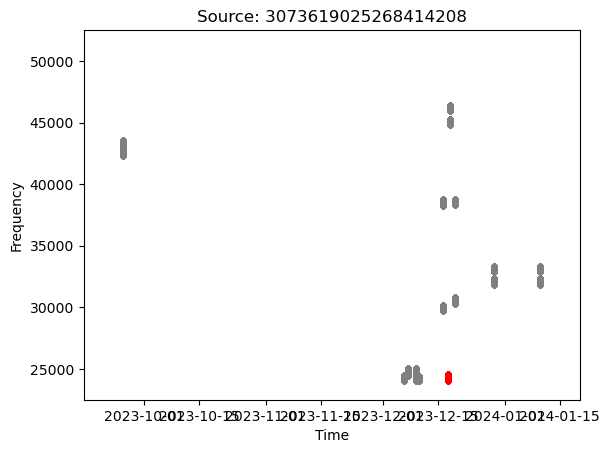

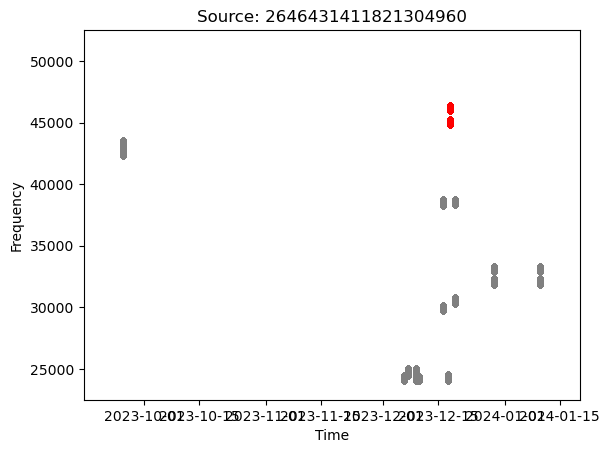

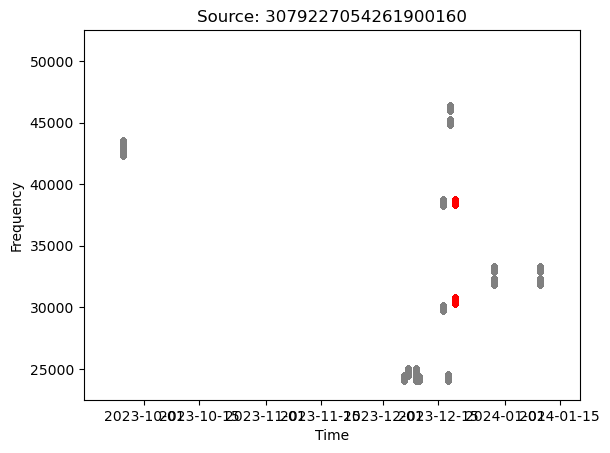

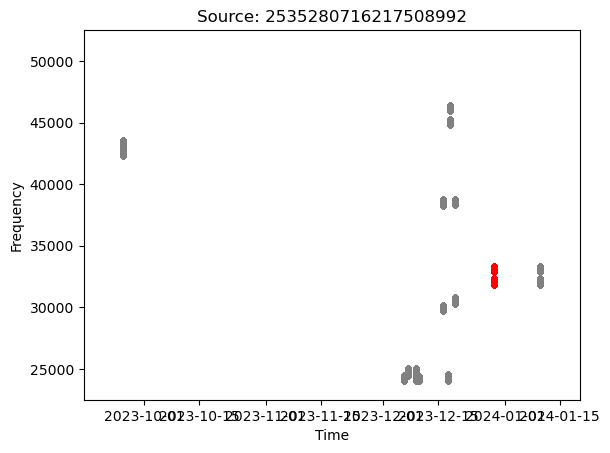

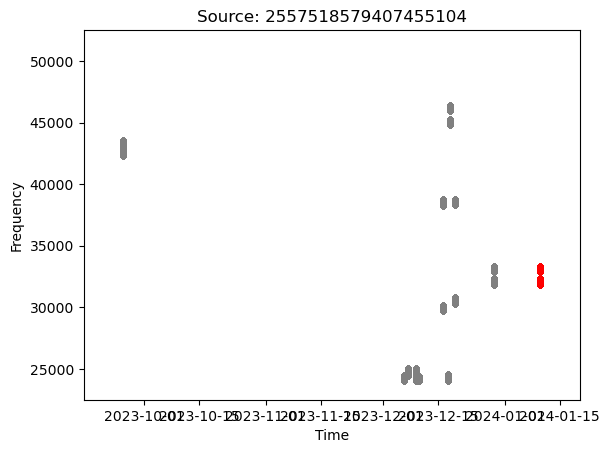

In [9]:
# Get global times and frequencies
all_f = coherent["signal_frequency"]
all_t = coherent["tstart_h"]

# Loop through each source and plot it in color, with the others in greyscale
for source in coherent["source_name"].unique():
    hits_on_source = coherent[coherent["source_name"] == source]
    t = hits_on_source["tstart_h"]
    f = hits_on_source["signal_frequency"]
    plt.scatter(all_t, all_f, marker=".", color="grey") # Plot all observations in grey
    plt.scatter(t, f, marker='.', color="red", zorder=100) # Plot these ones
    ten_days = np.timedelta64(10, 'D')
    plt.xlim([first_time - ten_days, last_time + ten_days]) # Set global x axis
    plt.ylim([22500, 52500]) # Set global y axis
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.title(f"Source: {source}")
    # plt.savefig(path + f'plots/observations_red/observations_of_{source}.png', format='png', dpi=300)
    plt.show()

## Target by function of frequency

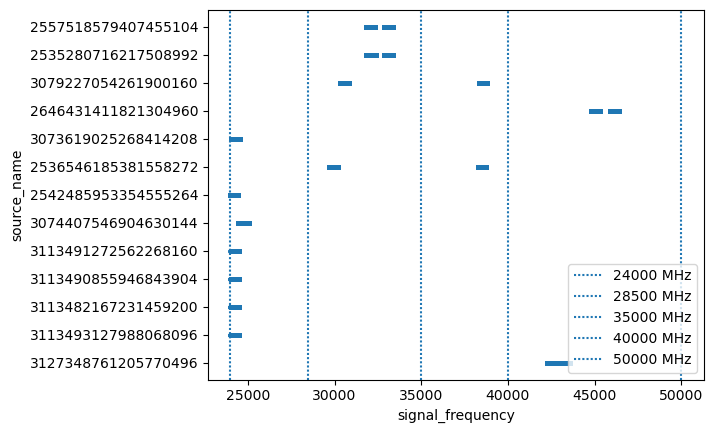

In [10]:
# Plot all hits in the frequencies observed, and by source
coherent.plot.scatter("signal_frequency", "source_name", marker=".")
# Put dividing lines beween regions of data that seem separate
dividers = [24000, 28500, 35000, 40000, 50000]
for divider in dividers:
    plt.axvline(divider, dashes=[1, 1, 1, 1], label=f"{divider} MHz")
plt.legend(loc="lower right")
plt.show()

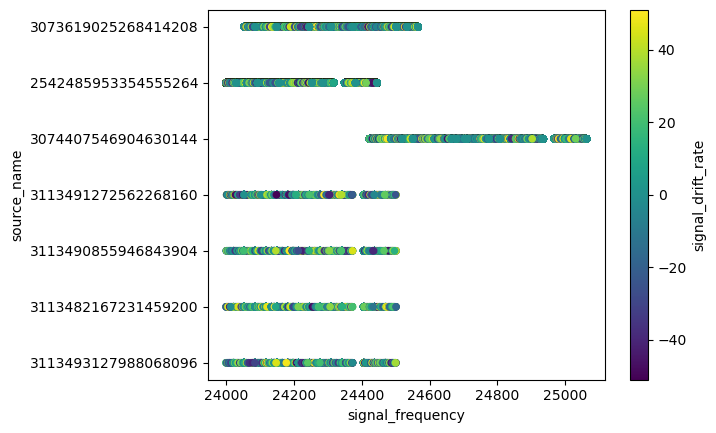

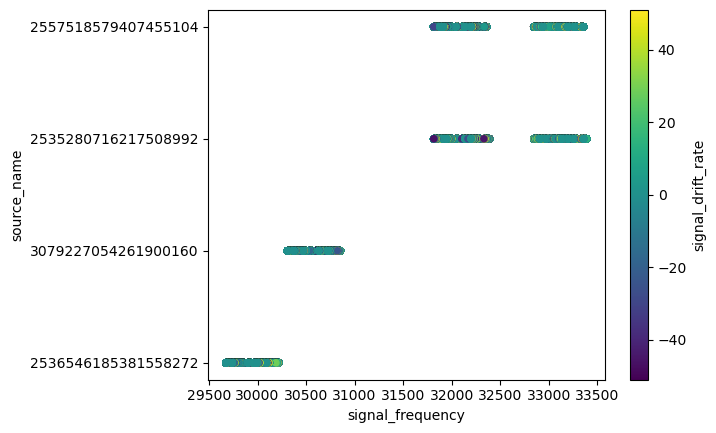

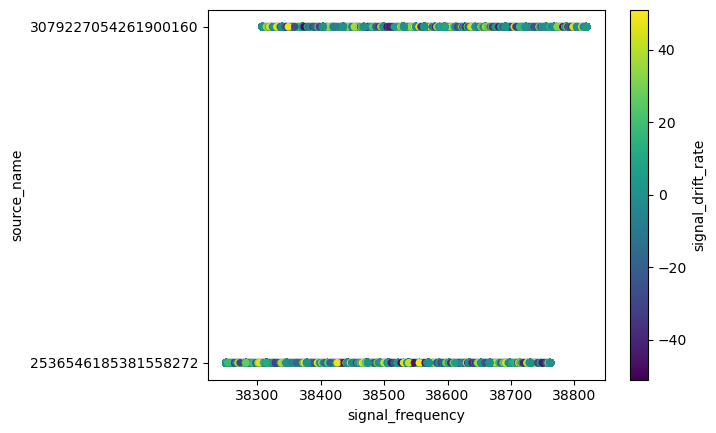

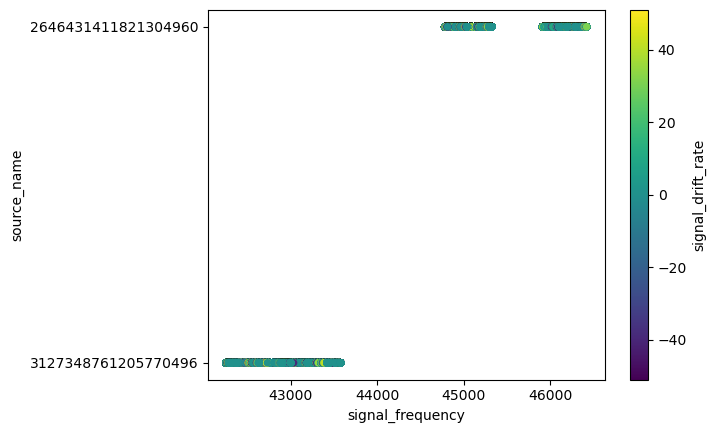

In [11]:
# Plot the same thing, but for each band (between dividers)
for i in range(len(dividers) - 1):
    lower_limit = dividers[i]
    upper_limit = dividers[i + 1]
    band = coherent[(coherent["signal_frequency"] < upper_limit) & (coherent["signal_frequency"] > lower_limit)]
    band.plot.scatter("signal_frequency", "source_name", c="signal_drift_rate")
    plt.show()

## Plot the RA, Dec for each source

In [12]:
for source in coherent["source_name"].unique():
    hits_on_source = coherent[coherent["source_name"] == source]
    print(f"Source: {source} -  {hits_on_source[['ra_hours', 'dec_degrees']].drop_duplicates()}")

Source: 3127348761205770496 -            ra_hours  dec_degrees
0         6.789733     3.277760
31094933  6.789716     3.277763
Source: 3113493127988068096 -           ra_hours  dec_degrees
2246969  6.772867     0.085401
Source: 3113482167231459200 -           ra_hours  dec_degrees
2251279    6.7854     0.095327
Source: 3113490855946843904 -           ra_hours  dec_degrees
2255584  6.758333     0.094458
Source: 3113491272562268160 -           ra_hours  dec_degrees
2255618    6.7596     0.108074
Source: 3074407546904630144 -           ra_hours  dec_degrees
4096619  8.897533    -0.145397
Source: 2542485953354555264 -           ra_hours  dec_degrees
5204789  0.633264     -1.10833
Source: 2536546185381558272 -            ra_hours  dec_degrees
13731780  1.026073      0.52676
Source: 3073619025268414208 -            ra_hours  dec_degrees
19417106  8.638733     -0.69966
Source: 2646431411821304960 -            ra_hours  dec_degrees
19844695   23.7204      1.35847
Source: 3079227054261900160 - 

## Look at how many observations were made with one vs. 2 beams

In [13]:
# Look at how many observations are taken forming how many beams
plt.bar(["One Beam", "Two Beams"], [sum(num_beams == 1), sum(num_beams == 2)])
plt.xlabel("Number of Beams")
plt.ylabel("Observations With This Many Beams")

NameError: name 'num_beams' is not defined

## Look at statistics on features

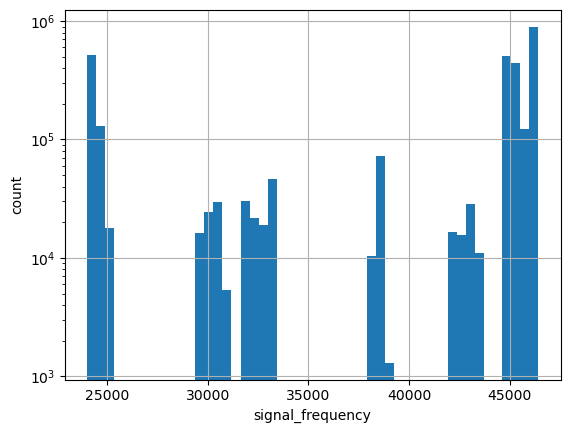

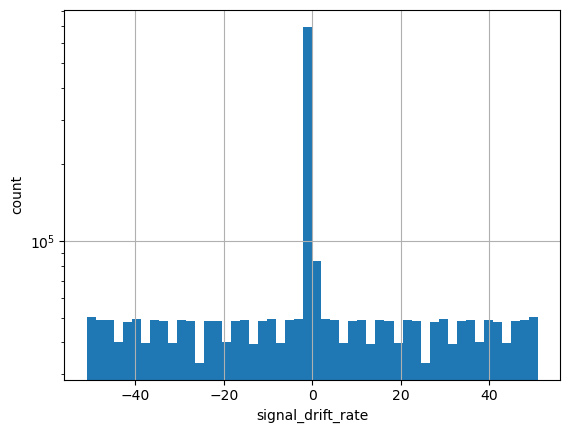

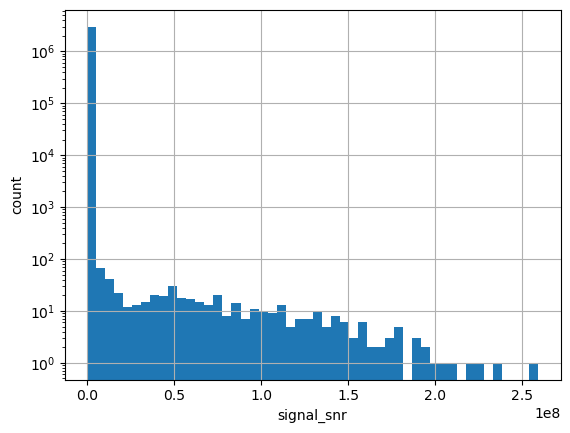

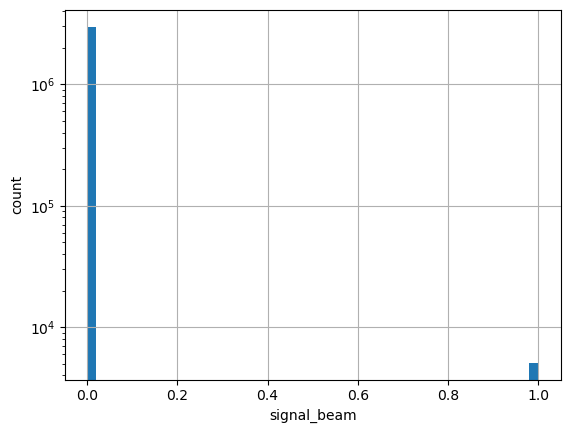

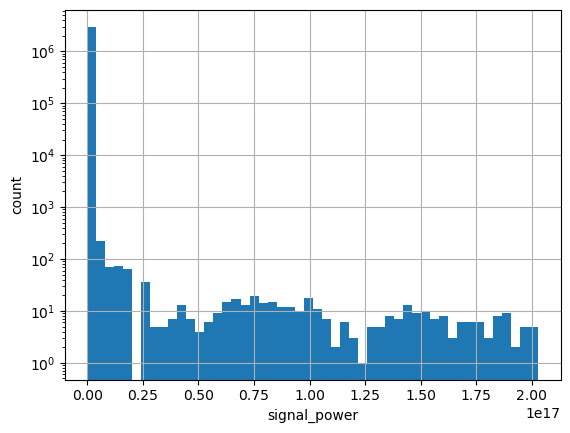

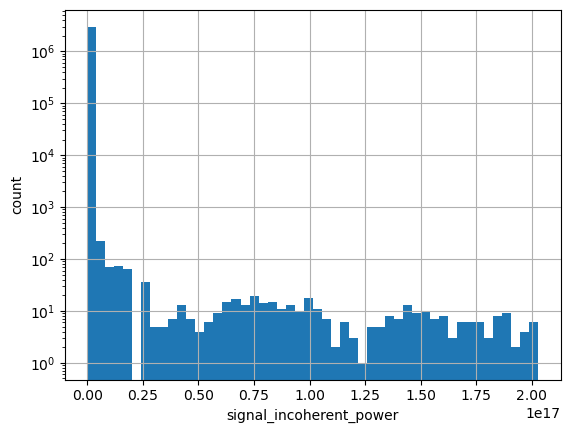

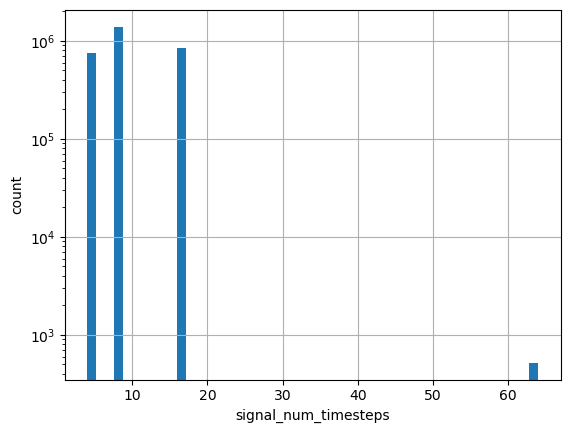

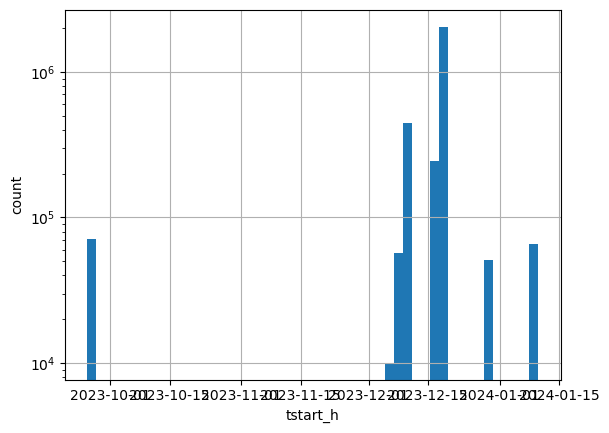

In [ ]:
features = ["signal_frequency",
            "signal_drift_rate",
            "signal_snr",
            "signal_beam",
            "signal_power",
            "signal_incoherent_power",
            "signal_num_timesteps",
            "tstart_h"]

for feature in features:
    coherent[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.yscale("log")
    plt.show()

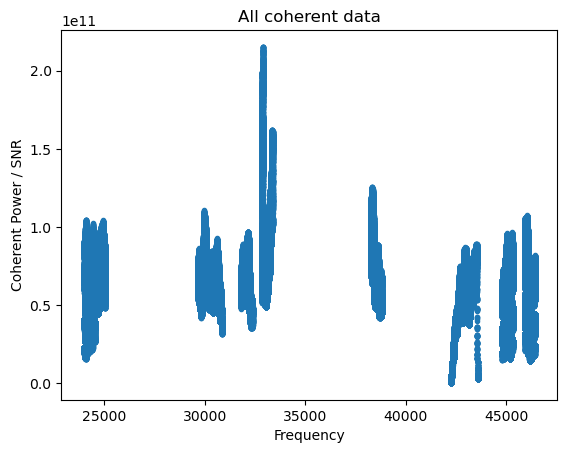

In [ ]:
cp = coherent["signal_power"]
snr = coherent["signal_snr"]
f = coherent["signal_frequency"]

plt.scatter(f, cp / snr, marker='.')
plt.xlabel("Frequency")
plt.ylabel("Coherent Power / SNR")
plt.title("All coherent data")
plt.show()

## Hits per time on sky

In [ ]:
# Given a frequency (in MHz), returns a band label (string)
def round_to_bin(f):
    if f < 25000:
        return "Below K-band"
    elif f < 26500:
        return "K-band"
    elif f < 40000:
        return "Ka-band"
    elif f < 50000:
        return "Q-band"
    else:
        return "Above Q-band"

In [ ]:
def color_by_band(band):
    if band == "Below K-band":
        return "black"
    elif band == "K-band":
        return "green"
    elif band == "Ka-band":
        return "orange"
    elif band == "Q-band":
        return "purple"
    elif band == "Above Q-band":
        return "grey"
    else:
        return "yellow"

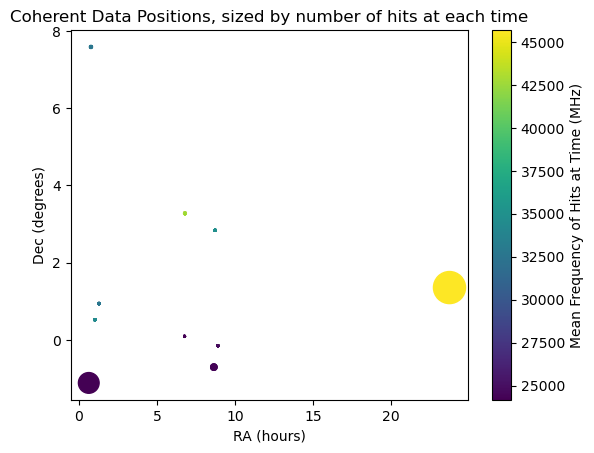

In [ ]:
# Group observations by when they were taken
by_observation = coherent.groupby("tstart_h")
freqs = []
bands = []
hits = []
ras = []
decs = []
for t in coherent["tstart_h"].unique():
    # Get the data in this group
    time = by_observation.get_group(t)
    
    # Want to know ~what frequencies were observed, so just take mean of hits
    frequency_of_observation = time["signal_frequency"].mean() 
    freqs.append(frequency_of_observation)
    bands.append(round_to_bin(frequency_of_observation))
    
    # Want to know how many hits
    num_hits = time["signal_frequency"].count()
    hits.append(num_hits)

    # Get the RA/dec of the observation
    ras.append(time["ra_hours"].mean())
    decs.append(time["dec_degrees"].mean())

    # Make sure that they're all from the same place
    # if (len(time["ra_hours"].unique()) > 1 or len(time["dec_degrees"].unique()) > 1):
    #     print(time["ra_hours"].unique())
    #     print(time["dec_degrees"].unique())
    # assert(len(time["ra_hours"].unique()) == 1)
    # assert(len(time["dec_degrees"].unique()) == 1)
    

# bands = np.array(bands)
hits = np.array(hits)
ras = np.array(ras)
decs = np.array(decs)

plt.scatter(ras, decs, s=hits / 1000, c=freqs)
cbar = plt.colorbar()
cbar.set_label("Mean Frequency of Hits at Time (MHz)")
plt.xlabel("RA (hours)")
plt.ylabel("Dec (degrees)")
plt.title("Coherent Data Positions, sized by number of hits at each time")
plt.show()

In [ ]:
len(coherent["tstart_h"].unique())

645

Text(0.5, 1.0, 'Number of Hits on Unique Sources\nBands: blue=k, orange=ka, green=Q')

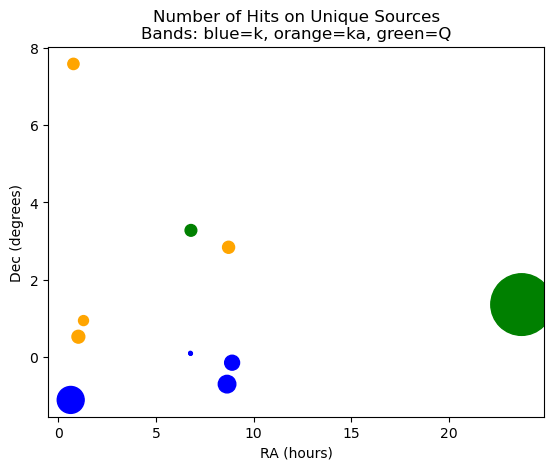

In [ ]:
# Get number of observations for each ra value
coherent['No_of_Obs'] = coherent.groupby('ra_hours')['ra_hours'].transform('count')
# Save which band an observation is from
coherent["Receiver"] = pd.cut(x=coherent['signal_frequency'], bins=[24000, 26500, 40000, 50000], labels=["K-band","Ka-band","Q-band"])

# Define a certain color for each band
def receiver_to_color(r):
    if r == "K-band":
        return "blue"
    elif r == "Ka-band":
        return "orange"
    elif r== "Q-band":
        return "green"

# Just take the first hit in each location group as the data to plot
to_plot = coherent.groupby("ra_hours").first()
ras = to_plot.index # to_plot["ra_hours"] doesn't exist because ras are the index of the group
plt.scatter(ras, to_plot["dec_degrees"], s=to_plot["No_of_Obs"]/1000, c=[receiver_to_color(receiver) for receiver in to_plot["Receiver"]])
plt.xlabel("RA (hours)")
plt.ylabel("Dec (degrees)")
plt.title("Number of Hits on Unique Sources\nBands: blue=k, orange=ka, green=Q")

In [ ]:
# See what relative sizes of circles are
print(to_plot["No_of_Obs"])

ra_hours
0.633264      374775
0.773367       65745
1.026073       85209
1.289133       51451
6.758333        5043
6.759600        5079
6.772867        4998
6.785400        4983
6.789716         519
6.789733       70906
8.638733      159049
8.716867       74735
8.897533      114945
23.720400    1967303
Name: No_of_Obs, dtype: int64


In [ ]:
# Get first 4 and last ID to turn into file_uri for Chenoa
print(coherent["id"][0:4])
print(coherent["id"].iloc[-1])

0    900273190
1    900273191
2    900273192
3    900273193
Name: id, dtype: int64
1034777916


## P/snr vs. frequency for one source

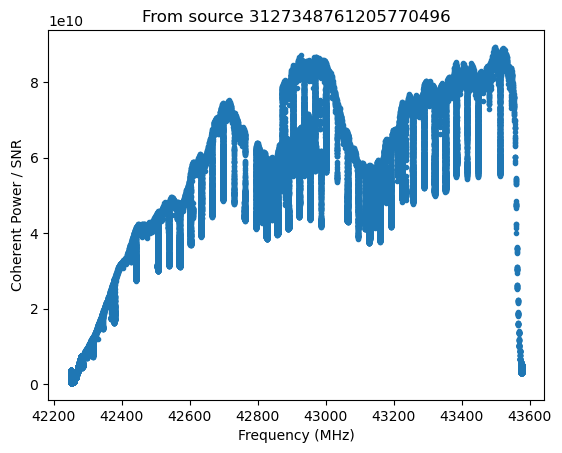

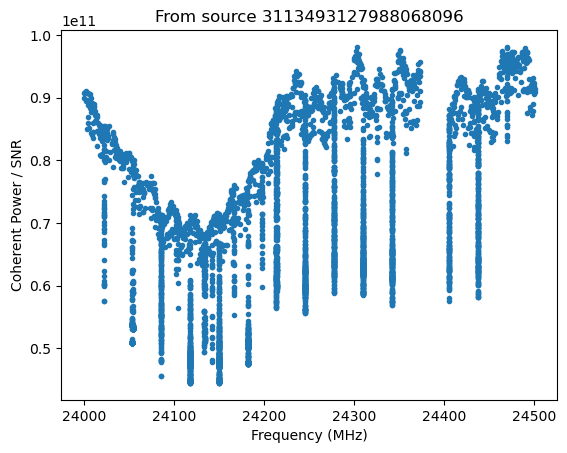

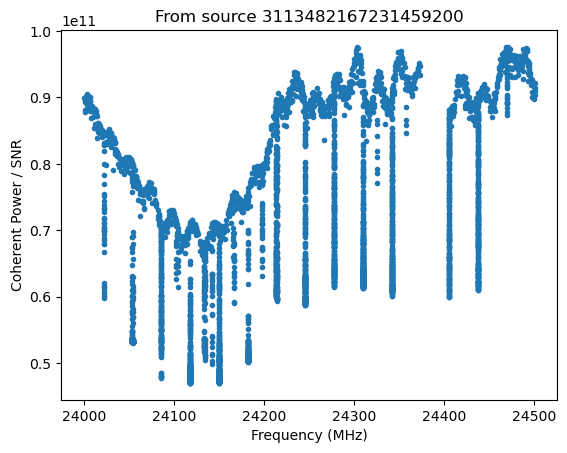

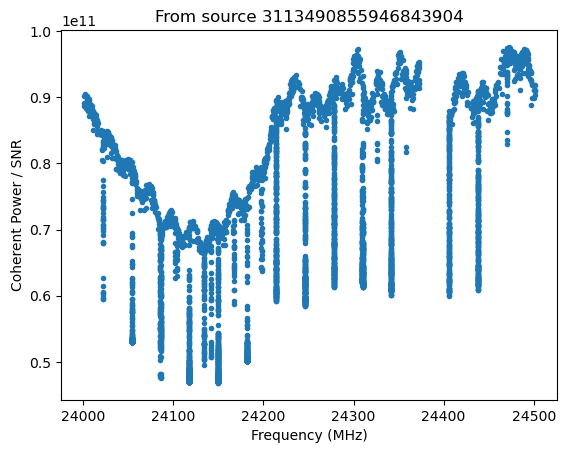

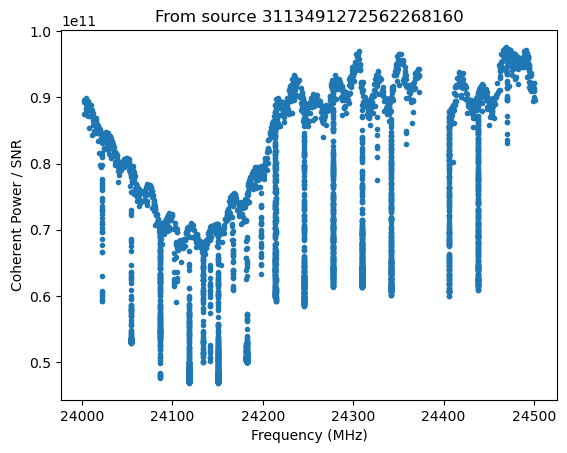

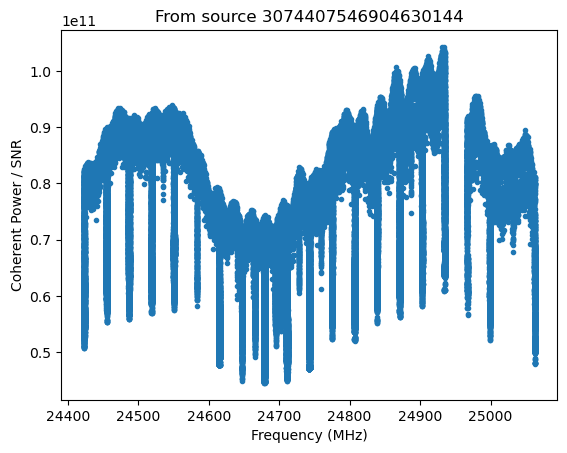

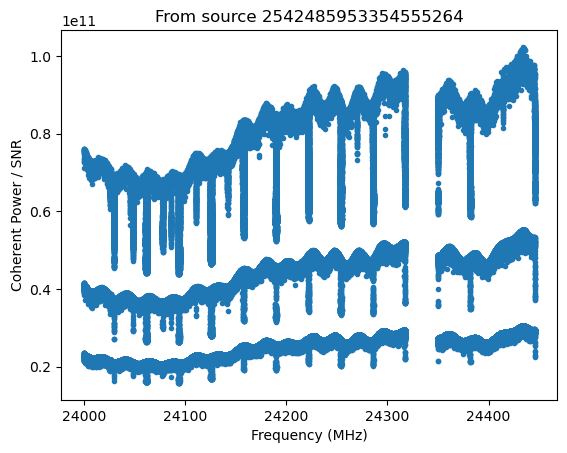

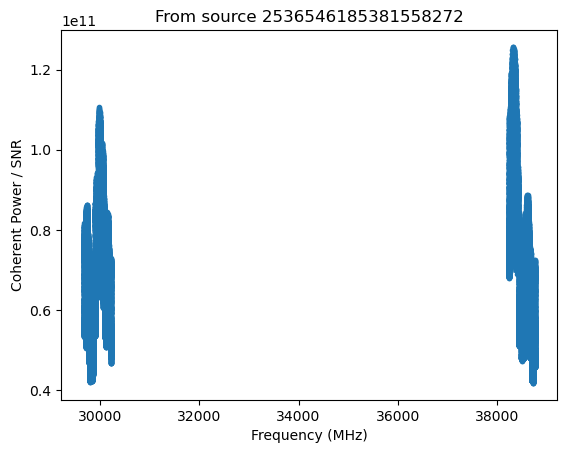

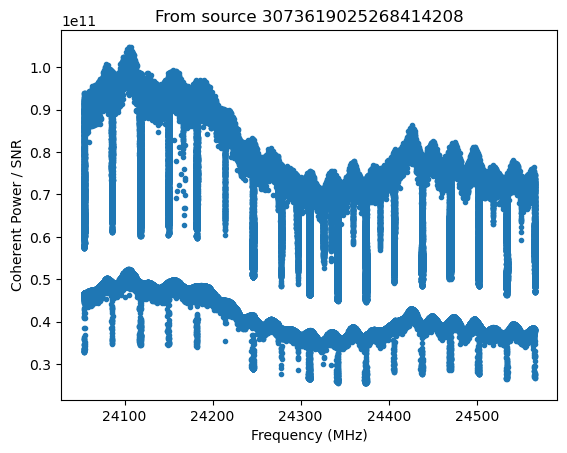

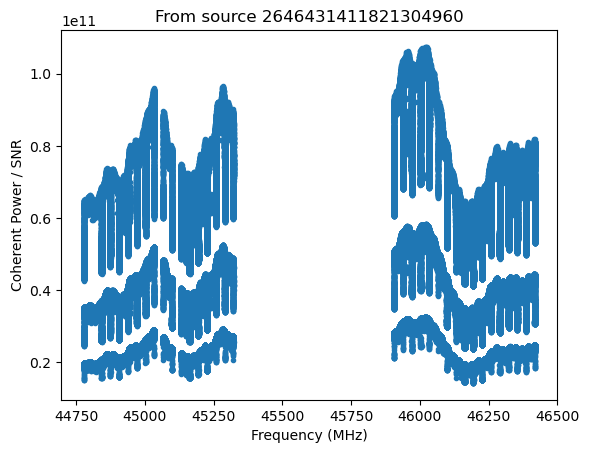

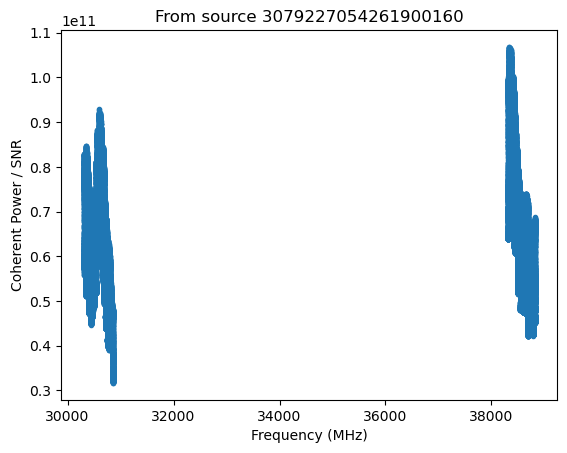

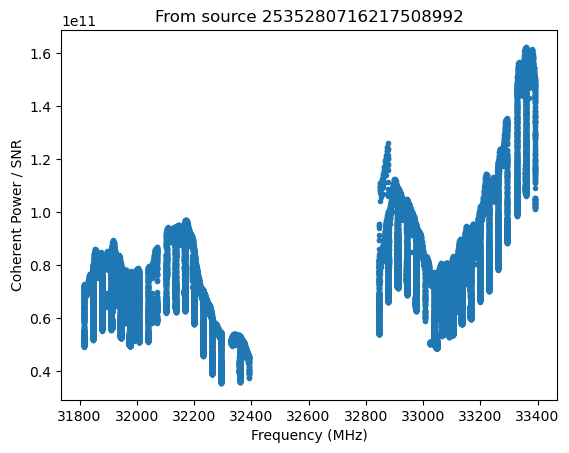

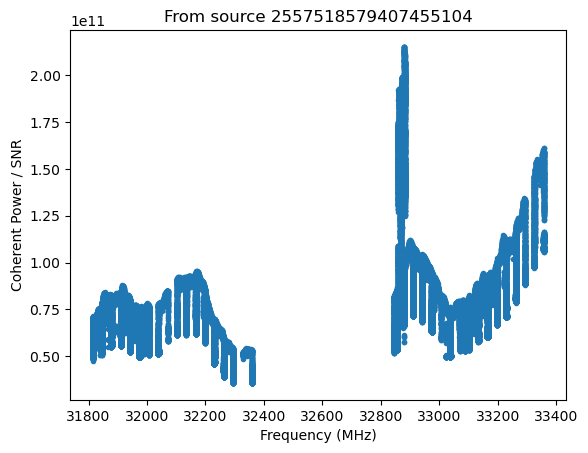

In [ ]:
for source in coherent["source_name"].unique():
    all_first_source = coherent[coherent["source_name"] == source]
    p = all_first_source["signal_power"]
    snr = all_first_source["signal_snr"]
    freq = all_first_source["signal_frequency"]

    plt.scatter(freq, p/snr, marker=".")
    plt.xlabel("Frequency (MHz)")
    plt.ylabel("Coherent Power / SNR")
    plt.title(f"From source {source}")
    plt.show()

## Misc

In [5]:
coherent.columns

Index(['id', 'signal_frequency', 'signal_drift_rate', 'signal_snr',
       'signal_beam', 'signal_power', 'signal_incoherent_power',
       'signal_num_timesteps', 'tstart', 'tstart_h', 'ra_hours', 'dec_degrees',
       'source_name'],
      dtype='object')